In [69]:
import numpy as np
import random
import matplotlib.pyplot as plt
import urllib
import json
import os
os.environ['PROJ_LIB'] = r'C:\Users\XXXXX\Anaconda3\pkgs\proj4-5.2.0- ha925a31_1\Library\share'
from mpl_toolkits.basemap import Basemap

In [70]:
def f(i):
    global fn
    return(eval(fn))


def riemann_sum(a,b,n,fn):
    sum=0
    n_array=np.linspace(a,b,n)
    for x in n_array:
        sum+=eval(fn)*(b-a)/n
    return sum

## 

In [71]:
def unit_circle(N):
    N_return=[]
    for i in range(N):
        x=random.uniform(-1,1)
        pm=random.randint(0,1)
        if pm==0:
            y=(-1)*np.sqrt(1-x**2)
        else:
            y=np.sqrt(1-x**2)
        N_return.append([x,y])
    return N_return


def visual(points):
    x_coordinates=[]
    y_coordinates=[]
    for i in points:
        plt.scatter(i[0],i[1])
    plt.show()

In [53]:
def unit_circle_3d(N):
    N_return=[]
    for i in range(N):
        r=random.uniform(-1,1)
        theta=random.randint(0,360)
        x=r*np.cos(np.radians(theta))
        y=r*np.sin(np.radians(theta))
        pm=random.randint(0,1)
        if pm==0:
            z=(-1)*np.sqrt(1-r**2)
        else:
            z=np.sqrt(1-r**2)
        N_return.append([x,y,z])
    return N_return


def visual_3d(points):
    fig = plt.figure(figsize=(5, 5))
    ax = fig.add_subplot(projection='3d')
    x_coordinates=[]
    y_coordinates=[]
    z_coordinates=[]
    for i in points:
        ax.scatter(i[0],i[1],i[2])
    plt.show()

In [54]:
def unit_circle_high_order(N,dimension):
    N_return=[]
    for i in range(N):
        N_return=[]
        for i in range(N):
            numbers=[]
            counter=0
            for j in range(dimension):
                counter+=1
                bound=0
                for k in numbers:
                    bound+=k**2    
                if counter==dimension:
                    number=np.sqrt(1-bound)
                else:
                    number=random.uniform(-1+bound,1-bound)**2
                pm=random.randint(0,1)
                if pm==0:
                    number=(-1)*number
                numbers.append(number)
            N_return.append(numbers)
    return N_return

In [167]:
def stop():
    with urllib.request.urlopen("https://data.ibb.gov.tr/api/3/action/datastore_search?resource_id=d1f7c258-bbc1-406f-9ab2-7a7c1797c673&limit=6440") as url:
        source = url.read()
        json_read=json.loads(source)
        stop=[]
        for i in json_read['result']['records']:
            stop_id=i['stop_id']
            stop_lat=i['stop_lat']
            stop_lon=i['stop_lon']
            stop.append([stop_id,stop_lat,stop_lon])
    return stop

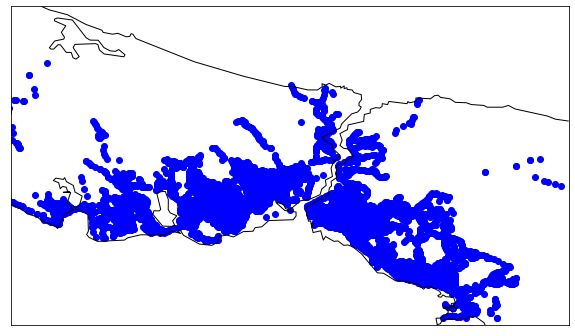

In [168]:
plt.figure(figsize=(10,10))
m = Basemap(projection='cyl',llcrnrlat=40.8,urcrnrlat=41.4,\
        llcrnrlon=28.45,urcrnrlon=29.5,resolution='h')

for i in stop():
    lon, lat = float(i[2]),float(i[1])
    xpt,ypt = m(lon,lat)
    lonpt, latpt = m(xpt,ypt,inverse=True)
    m.plot(xpt,ypt,'bo')
m.drawcoastlines()
plt.show()

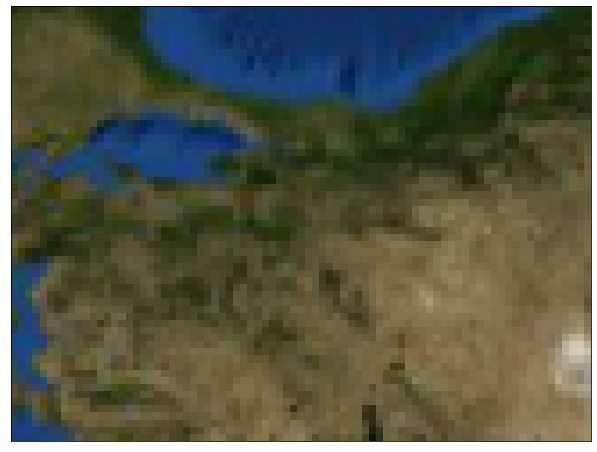

In [89]:
fig = plt.figure(num=None, figsize=(12, 8) ) 
m = Basemap(width=600000,height=450000,resolution='h',projection='aea',lat_1=39,lat_2=41,lon_0=30,lat_0=40)
m.bluemarble()

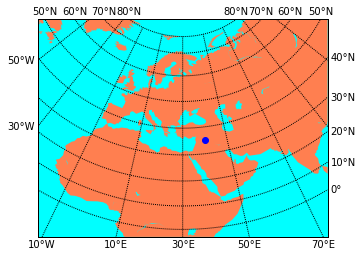

In [95]:
m = Basemap(width=12000000,height=9000000,projection='aea',
            resolution='c',lat_1=39,lat_2=41,lon_0=30,lat_0=40)
# draw a boundary around the map, fill the background.
# this background will end up being the ocean color, since
# the continents will be drawn on top.
m.drawmapboundary(fill_color='aqua')
# fill continents, set lake color same as ocean color.
m.fillcontinents(color='coral',lake_color='aqua')
# draw parallels and meridians.
# label parallels on right and top
# meridians on bottom and left
parallels = np.arange(0.,81,10.)
# labels = [left,right,top,bottom]
m.drawparallels(parallels,labels=[False,True,True,False])
meridians = np.arange(10.,351.,20.)
m.drawmeridians(meridians,labels=[True,False,False,True])
# plot blue dot on Boulder, colorado and label it as such.
lon, lat = 40,35
xpt,ypt = m(lon,lat)
# convert back to lat/lon
lonpt, latpt = m(xpt,ypt,inverse=True)
m.plot(xpt,ypt,'bo')
plt.show()